# Phillies 2023 Playoff Run

In [1]:
%run "Baseball Functions.ipynb"

## Import Functions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import baseball_functions.py as ks # This is a ridiculous function call, my brotha.
import warnings
warnings.filterwarnings('ignore')


## Get Data
Most data exported via Statcast Search page on Baseball Savant. (https://baseballsavant.mlb.com/statcast_search) <br>
This is a collection of functions that clean and aggregate pitch-level Statcast data exported from Baseball Savant. <br>
Some of the logic here may be useful in other regards.

In [2]:
# This particular process is very painful

In [4]:
# Get all the data in
pl2023 = pd.read_csv('phillies lineup_2023.csv')
pb2023 = pd.read_csv('phillies bench_2023.csv')
b_playoff = pd.read_csv('phillies batters_playoff history.csv')
phils_batters_nlwc_nlds = pd.read_csv('phils_batters_nlwc_nlds.csv')
ps2023 = pd.read_csv('phillies starters_2023.csv')
pr2023 = pd.read_csv('phillies relievers_2023.csv')
p_playoff = pd.read_csv('phillies pitchers_playoff history.csv')
phils_pitchers_nlwc_nlds = pd.read_csv('phils_pitchers_nlwc_nlds.csv')
jean = pd.read_csv('segura_playoffs.csv')
b_2023_09_30 = pd.read_csv('phillies_batters_2023-09030.csv')
p_2023_09_30 = pd.read_csv('phillies_pitchers_2023-09030.csv')
b_2023_10_01 = pd.read_csv('phillies_pitchers_2023_10_01.csv')
p_2023_10_01 = pd.read_csv('phillies_batters_2023_10_01.csv')


woba_weights = pd.read_csv('wOBA and FIP Constants.csv')


## WC -- Marlins
ml2023 = pd.read_csv('marlins_lineup_2023.csv')
mb2023 = pd.read_csv('marlins_bench_2023.csv')
m_b_playoff = pd.read_csv('marlins_batters_playoff history.csv')
ms2023 = pd.read_csv('marlins_starters_2023.csv')
mr2023 = pd.read_csv('marlins_relievers_2023.csv')
m_p_playoff = pd.read_csv('marlins_pitchers_playoff history.csv')

## NLDS -- Braves
## KS Notes - I was in Raleigh for this series, no data analyses since I was spending time with my family.
## KS Notes - I am super fucking baked rn, to put mildly this is a risky play. Baking and Coding?

## NLCS -- Diamondbacks
b_db2023 = pd.read_csv('az_batters_2023.csv')
p_db2023 = pd.read_csv('az_pitchers_2023.csv')
b_db_playoffs = pd.read_csv('az_batters_playoffs.csv')
p_db_playoffs = pd.read_csv('az_pitchers_playoffs.csv')
b_az_vs_phillies_history = pd.read_csv('b_az_vs_phillies_history.csv')
p_az_vs_phillies_history = pd.read_csv('p_az_vs_phillies_history.csv')
p_nlcs = pd.read_csv('p_nlcs.csv')
b_nlcs = pd.read_csv('b_nlcs.csv')


# Mash them together
b_2023 = pd.concat([pl2023, pb2023, b_2023_09_30, b_2023_10_01, ml2023, mb2023, b_db2023])
p_2023 = pd.concat([ps2023, pr2023, p_2023_09_30, p_2023_10_01, ms2023, mr2023, p_db2023])
reg2023 = pd.concat([b_2023, p_2023]).merge(woba_weights, left_on = 'game_year', right_on = 'Season')
playoffs = pd.concat([b_playoff, p_playoff, jean, m_b_playoff, m_p_playoff, phils_batters_nlwc_nlds, phils_pitchers_nlwc_nlds
                     ,b_db_playoffs, p_db_playoffs, p_nlcs, b_nlcs]).merge(woba_weights, left_on = 'game_year', right_on = 'Season')

## Phillies vs Marlins Game 1

In [5]:
player_playoffs = get_stats('player_name', playoffs)

AttributeError: module 'pandas' has no attribute 'np'

In [ ]:
# How to Visualize
# 3x3 grid of subplots, group at the player and zone level then plot in each area of the strike zone
# Higher level callouts
# grid of subplots for each of the players, group by players

player_playoffs = get_stats('player_name', playoffs)

player_2023 = get_stats('player_name', reg2023)

wheeler_playoffs = player_playoffs[player_playoffs['player_name'] == 'Wheeler, Zack']

wheeler_playoffs

rojas = reg2023[reg2023['player_name'] == 'Rojas, Johan']



get_stats('pitch_name',rojas[(rojas.p_throws == 'L') & (rojas.pitch_name == 'Changeup')])

playoffs[(playoffs.player_name == 'Wheeler, Zack')
        &(playoffs.pitch_name.isin(['Sinker', '4-Seam Fastball']))
        ].groupby('pitch_name').agg({'release_speed' : 'mean'})

reg2023[(reg2023.player_name == 'Wheeler, Zack')
        &(reg2023.pitch_name.isin(['Sinker', '4-Seam Fastball']))
        ].groupby('pitch_name').agg({'release_speed' : 'mean'})

soriano_pitches = get_stats('pitch_name', reg2023[reg2023.player_name == 'Soriano, George'])

soriano_pitches

reg2023[reg2023.player_name == 'Soriano, George'].groupby('pitch_name').agg({'release_speed' : 'mean'
                                                                             ,'release_spin_rate' : 'mean'
                                                                             ,'pfx_x' : 'mean'
                                                                             ,'pfx_z' : 'mean'
                                                                            })

soriano_pitches.rename(columns = {'batter' : 'pitches'},inplace = True)

soriano_pitches['ba'] = soriano_pitches['hits']/soriano_pitches['at_bats']
soriano_pitches['obp'] = (soriano_pitches.hits + soriano_pitches.walks + soriano_pitches.hbp) / (soriano_pitches.plate_apps)
soriano_pitches['slg'] = (soriano_pitches.singles + 2*soriano_pitches.doubles + 3*soriano_pitches.triples + 4*soriano_pitches.hrs) / (soriano_pitches.at_bats)
soriano_pitches['ops'] = soriano_pitches.obp + soriano_pitches.slg
soriano_pitches['woba'] = (soriano_pitches.wBB + soriano_pitches.wHBP+ soriano_pitches.w1B+ soriano_pitches.w2B+ soriano_pitches.w3B+ soriano_pitches.wHR) / (soriano_pitches.plate_apps)

soriano_pitches.loc[:, ['pitch_name', 'ba', 'obp', 'slg', 'ops', 'woba']]



brazoban = reg2023[reg2023.player_name == 'Brazoban, Huascar']

brazoban_pitches = brazoban.groupby('pitch_name').agg({'pitch_type' : 'count'
                                    ,'release_speed' : 'mean'
                                    ,'release_spin_rate' : 'mean'
                                    ,'pfx_x' : 'mean'
                                    ,'pfx_z' : 'mean'
                                   }).reset_index()

brazoban_stats = get_stats('pitch_name', brazoban)

In [ ]:
brazoban_stats.rename(columns = {'batter' : 'pitches'},inplace = True)

brazoban_stats['ba'] = brazoban_stats['hits']/brazoban_stats['at_bats']
brazoban_stats['obp'] = (brazoban_stats.hits + brazoban_stats.walks + brazoban_stats.hbp) / (brazoban_stats.plate_apps)
brazoban_stats['slg'] = (brazoban_stats.singles + 2*brazoban_stats.doubles + 3*brazoban_stats.triples + 4*soriano_pitches.hrs) / (brazoban_stats.at_bats)
brazoban_stats['ops'] = brazoban_stats.obp + brazoban_stats.slg
brazoban_stats['woba'] = (brazoban_stats.wBB + brazoban_stats.wHBP+ brazoban_stats.w1B+ brazoban_stats.w2B+ brazoban_stats.w3B+ brazoban_stats.wHR) / (brazoban_stats.plate_apps)

brazoban_pitches

brazoban_stats.merge(brazoban_pitches, left_on = 'pitch_name', right_on = 'pitch_name')[['pitch_name', 'pitch_type', 'release_speed', 'ba', 'obp', 'slg', 'ops', 'woba']]



get_stats('player_name',reg2023[(reg2023.player_name == 'Soler, Jorge') & (reg2023.p_throws == 'R') & (reg2023.pitch_name == 'Slider')])

kerkering = reg2023[reg2023.player_name == 'Kerkering, Orion']

kerkering['h_break'] = kerkering.pfx_x*12

kerkering[(kerkering.pitch_name == 'Sweeper') & (kerkering.h_break >= 17)].agg({'pitch_type' : 'count', 'release_speed' : 'mean'})

len(kerkering)

## Kellen Pre Diamondbacks Series

### Phillies Lineup

In [54]:
phils_lineup = ['Schwarber, Kyle'
                ,'Turner, Trea'
                ,'Harper, Bryce'
                ,'Bohm, Alec'
                ,'Stott, Bryson'
                ,'Realmuto, J.T.'
                ,'Castellanos, Nick'
                ,'Marsh, Brandon'
                ,'Rojas, Johan'
               ]

df = pd.concat([reg2023[reg2023.player_name.isin(phils_lineup)], playoffs[playoffs.player_name.isin(phils_lineup)]])

In [ ]:
df.groupby('player_name').agg({'batter' : 'count'}).reset_index()

,player_name,batter
0,"Bohm, Alec",2564
1,"Castellanos, Nick",2856
2,"Harper, Bryce",2786
3,"Marsh, Brandon",2213
4,"Realmuto, J.T.",2474
5,"Rojas, Johan",645
6,"Schwarber, Kyle",4041
7,"Stott, Bryson",3013
8,"Turner, Trea",3557


In [63]:
batters = get_stats('player_name', df)

In [64]:
data = measure_calcs(batters)

In [66]:
data.loc[:,['player_name'
           ,'plate_apps'
           ,'at_bats'
           ,'ba'
           ,'obp'
           ,'slg'
           ,'ops'
           ,'woba']
        ]

,player_name,plate_apps,at_bats,ba,obp,slg,ops,woba
0,"Bohm, Alec",700,638,0.266458,0.321429,0.424765,0.746193,0.322613
1,"Castellanos, Nick",788,736,0.264946,0.304569,0.468750,0.773319,0.328659
2,"Harper, Bryce",720,615,0.291057,0.386111,0.533333,0.919444,0.393033
3,"Marsh, Brandon",530,458,0.270742,0.358491,0.458515,0.817006,0.352860
4,"Realmuto, J.T.",634,579,0.246978,0.304416,0.447323,0.751739,0.321923
5,"Rojas, Johan",187,171,0.269006,0.299465,0.380117,0.679582,0.291524
6,"Schwarber, Kyle",942,776,0.204897,0.339703,0.476804,0.816507,0.351972
7,"Stott, Bryson",714,651,0.268817,0.319328,0.403994,0.723322,0.313416
8,"Turner, Trea",914,851,0.265570,0.314004,0.443008,0.757013,0.325216


This would be more appropriate if I had all my data processing handled!

In [73]:
gallen_phillies = p_az_vs_phillies_history[p_az_vs_phillies_history.player_name == 'Gallen, Zac']

In [80]:
phils_batter_ids = df.groupby('player_name').agg({'batter' : 'max'}).reset_index().rename(columns = {'batter' : 'id'})

In [81]:
phils_batter_ids

,player_name,id
0,"Bohm, Alec",664761
1,"Castellanos, Nick",592206
2,"Harper, Bryce",547180
3,"Marsh, Brandon",669016
4,"Realmuto, J.T.",592663
5,"Rojas, Johan",679032
6,"Schwarber, Kyle",656941
7,"Stott, Bryson",681082
8,"Turner, Trea",607208


### vs Zac Gallen

In [87]:
gallen_phillies = gallen_phillies.merge(phils_batter_ids, left_on = 'batter', right_on = 'id', suffixes = ('','_y')).rename(columns = {'player_name_y' : 'hitter'})

In [89]:
gallen_phillies = gallen_phillies.merge(woba_weights, left_on = 'game_year', right_on = 'Season')

In [91]:
gallen_phillies_stats = get_stats('hitter', gallen_phillies)

In [92]:
gallen_phillies_calcs = measure_calcs(gallen_phillies_stats)

In [94]:
gpc = gallen_phillies_calcs

In [95]:
gpc

,hitter,pitches,plate_apps,at_bats,hits,singles,doubles,triples,hrs,walks,...,w1B,w2B,w3B,strikeouts,wHR,ba,obp,slg,ops,woba
0,"Bohm, Alec",20,6,5,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000,0.000,0.0,0.0,0.000,0.000000,0.166667,0.000000,0.166667,0.114833
1,"Castellanos, Nick",23,5,4,1.0,1.0,0.0,0.0,0.0,1.0,...,0.884,0.000,0.0,1.0,0.000,0.250000,0.400000,0.250000,0.650000,0.316000
2,"Harper, Bryce",58,13,12,4.0,3.0,1.0,0.0,0.0,1.0,...,2.650,1.242,0.0,3.0,0.000,0.333333,0.384615,0.416667,0.801282,0.352615
3,"Marsh, Brandon",15,4,4,2.0,2.0,0.0,0.0,0.0,0.0,...,1.766,0.000,0.0,1.0,0.000,0.500000,0.500000,0.500000,1.000000,0.441500
4,"Realmuto, J.T.",26,4,3,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000,0.000,0.0,1.0,0.000,0.000000,0.250000,0.000000,0.250000,0.173000
5,"Schwarber, Kyle",42,8,7,1.0,0.0,0.0,0.0,1.0,1.0,...,0.000,0.000,0.0,3.0,2.072,0.142857,0.250000,0.571429,0.821429,0.346000
6,"Stott, Bryson",18,6,6,2.0,2.0,0.0,0.0,0.0,0.0,...,1.766,0.000,0.0,1.0,0.000,0.333333,0.333333,0.333333,0.666667,0.294333
7,"Turner, Trea",82,20,18,4.0,2.0,1.0,0.0,1.0,2.0,...,1.740,1.261,0.0,6.0,2.007,0.222222,0.300000,0.444444,0.744444,0.319500


In [98]:
gpc.loc[:, ['hitter'
            ,'pitches'
            ,'plate_apps'
            ,'at_bats'
            ,'ba'
            ,'obp'
            ,'slg'
            ,'ops'
            ,'woba'
           ]
       ].sort_values(by='woba', ascending = False)

,hitter,pitches,plate_apps,at_bats,ba,obp,slg,ops,woba
3,"Marsh, Brandon",15,4,4,0.500000,0.500000,0.500000,1.000000,0.441500
2,"Harper, Bryce",58,13,12,0.333333,0.384615,0.416667,0.801282,0.352615
5,"Schwarber, Kyle",42,8,7,0.142857,0.250000,0.571429,0.821429,0.346000
7,"Turner, Trea",82,20,18,0.222222,0.300000,0.444444,0.744444,0.319500
1,"Castellanos, Nick",23,5,4,0.250000,0.400000,0.250000,0.650000,0.316000
6,"Stott, Bryson",18,6,6,0.333333,0.333333,0.333333,0.666667,0.294333
4,"Realmuto, J.T.",26,4,3,0.000000,0.250000,0.000000,0.250000,0.173000
0,"Bohm, Alec",20,6,5,0.000000,0.166667,0.000000,0.166667,0.114833


In [104]:
gpc_23 = data.merge(gpc, left_on = 'player_name', right_on = 'hitter', suffixes = ('_23', '_gallen'))

In [106]:
gpc_23['woba_diff'] = gpc_23['woba_gallen'] - gpc_23['woba_23']

In [110]:
gpc_23.loc[:, ['player_name', 'at_bats_gallen','woba_23', 'woba_gallen', 'woba_diff']].sort_values(by = 'woba_gallen',ascending = False)

,player_name,at_bats_gallen,woba_23,woba_gallen,woba_diff
3,"Marsh, Brandon",4,0.352860,0.441500,0.088640
2,"Harper, Bryce",12,0.393033,0.352615,-0.040418
5,"Schwarber, Kyle",7,0.351972,0.346000,-0.005972
7,"Turner, Trea",18,0.325216,0.319500,-0.005716
1,"Castellanos, Nick",4,0.328659,0.316000,-0.012659
6,"Stott, Bryson",6,0.313416,0.294333,-0.019083
4,"Realmuto, J.T.",3,0.321923,0.173000,-0.148923
0,"Bohm, Alec",5,0.322613,0.114833,-0.207780


### Schwarber Hot Zones

In [114]:
gallen_schwarber = gallen_phillies[gallen_phillies.hitter == 'Schwarber, Kyle']

In [120]:
gsz = get_stats('zone', gallen_schwarber)
gsz = measure_calcs(gsz)

In [116]:
gallen_schwarber.groupby('zone').agg({'pitch_type' : 'count'})

,pitch_type
zone,
1,4
2,1
4,1
5,3
6,1
7,3
9,4
11,5
12,3


In [125]:
gsz = gsz.replace(np.nan, 0)

In [140]:
gsz.loc[:, ['zone', 'pitches', 'plate_apps', 'hits', 'strikeouts', 'ba', 'woba']]

,zone,pitches,plate_apps,hits,strikeouts,ba,woba
0,1,4,2.0,0.0,1.0,0.0,0.000
1,2,1,0.0,0.0,0.0,0.0,0.000
2,4,1,0.0,0.0,0.0,0.0,0.000
3,5,3,1.0,0.0,1.0,0.0,0.000
4,6,1,0.0,0.0,0.0,0.0,0.000
5,7,3,1.0,1.0,0.0,1.0,2.072
6,9,4,2.0,0.0,1.0,0.0,0.000
7,11,5,1.0,0.0,0.0,0.0,0.000
8,12,3,1.0,0.0,0.0,0.0,0.696
9,13,8,0.0,0.0,0.0,0.0,0.000


In [142]:
for z in gsz.zone:
    print(z, ' - ', gsz.iloc)

1  -  0    0.0
Name: woba, dtype: float64
2  -  1    0.0
Name: woba, dtype: float64
4  -  2    0.0
Name: woba, dtype: float64
5  -  3    0.0
Name: woba, dtype: float64
6  -  4    0.0
Name: woba, dtype: float64
7  -  5    2.072
Name: woba, dtype: float64
9  -  6    0.0
Name: woba, dtype: float64
11  -  7    0.0
Name: woba, dtype: float64
12  -  8    0.696
Name: woba, dtype: float64
13  -  9    0.0
Name: woba, dtype: float64
14  -  10    0.0
Name: woba, dtype: float64


In [138]:
gsz.loc[:, ['zone', 'woba']]

,zone,woba
0,1,0.000
1,2,0.000
2,4,0.000
3,5,0.000
4,6,0.000
5,7,2.072
6,9,0.000
7,11,0.000
8,12,0.696
9,13,0.000


InvalidIndexError: (slice(None, None, None), None)

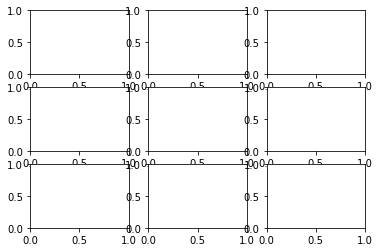

In [126]:
fig, axs = plt.subplots(3, 3)

axs[0,0].fill(gsz, gsz[gsz.zone == 1]['woba'])
axs[0,0].fill(gsz, gsz[gsz.zone == 2]['woba'])
axs[0,0].fill(gsz, gsz[gsz.zone == 3]['woba'])

axs[1,0].fill(gsz, gsz[gsz.zone == 4]['woba'])
axs[1,1].fill(gsz, gsz[gsz.zone == 5]['woba'])
axs[1,2].fill(gsz, gsz[gsz.zone == 6]['woba'])

axs[2,0].fill(gsz, gsz[gsz.zone == 7]['woba'])
axs[2,1].fill(gsz, gsz[gsz.zone == 8]['woba'])
axs[2,2].fill(gsz, gsz[gsz.zone == 9]['woba'])

plt.show()

In [ ]:
fig, axs = plt.subplots(2, 2) # plt.subplots(nrows, ncolumns)... ex. this creates a grid with four available figures

# Build a plot for the first cell in location (0,0) of the grid of subplots I just created
axs[0,0].plot(x, np.sin(x))
axs[0,0].set_title('Sine Wave')

# Build a plot for the location 0,1 in the grid of subplots
axs[0,1].plot(x, np.cos(x))
axs[0,1].set_title('Cosine Wave')

# Build a plot for the location 1,0 in the grid of subplots
axs[1,0].plot(x, np.random.random(100))
axs[1,0].set_title('Random Function')

# Build a plot for the location of 1,1 in the grid of subplots
axs[1,1].plot(x, np.log(x))
axs[1,1].set_title('Log Function')
axs[1,1].set_xlabel('TEST')

fig.suptitle('Four Plots') # Title of my grid of subplots
plt.tight_layout() 
plt.show()

# This looks awful
plt.savefig('fourplots.png', dpi = 300, transparent = True, bbox_inches='tight', pad_inches = 2)
# arguments for that savefig function may be useful for final delivery of shit

In [16]:
# So instead I am going to look at Taijuan Walker at Chase Field

In [4]:
df = pd.read_csv('walker_career pitches maybe wait F.csv').merge(woba_weights, left_on = 'game_year', right_on = 'Season')

In [97]:
game_dates = get_stats('game_date', df).merge(venues_dates, left_on = 'game_date', right_on = 'game_date')

In [107]:
game_dates.rename(columns = {'player_name' : 'venue'
                            ,'batter' : 'pitch_count'}, inplace = True)

select sum(ks) Strikeouts
       ,count(pitch_number) Pitch Count

       ,sum(ks)/9 = Kper9
    
from pitch_data
where pitcher = '231415' -- Taijuan Walker
--and game_type = 'playoff'
and venue = 'Chase Field' -- Nick Mai tried to gaslight me into thinking that SQL had a double equals sign?
group by game_date -- sloppy

In [ ]:
# Turn the above SQL into a pandas DF

game_dates

## Trea Turner Batted Ball Profile

### Aaron Nola xwoba vs Batter K%

In [7]:
nola = 605400 # Aaron Nola's Player Id
x_nola = pd.concat([reg2023[reg2023.pitcher == nola],playoffs[playoffs.pitcher == nola]])

In [3]:
nola = pd.concat([reg2023[reg2023.player_name == 'Nola, Aaron'],playoffs[playoffs.player_name == 'Nola, Aaron']])

In [4]:
x = nola

In [60]:
x = x_nola

In [62]:
get_stats('batter', x)

ValueError: cannot insert batter, already exists

In [59]:
x = get_stats('hitter', x)

KeyError: 'hitter'

In [54]:
x

,pitcher,batter,plate_apps,at_bats,hits,singles,doubles,triples,hrs,walks,hbp,wBB,wHBP,w1B,w2B,w3B,strikeouts,wHR
0,605400,3935,1019,958,239,142,51,4,42,52,3,36.157,2.172,125.284,63.519,6.272,254,84.471


In [10]:
discrepancies = [i for i in x_nola[~x_nola.isin(x)]]

In [15]:
x_nola[x_nola.game_pk.unique().isin(x.game_pk.unique())]

AttributeError: 'numpy.ndarray' object has no attribute 'isin'

In [38]:
joined = x_nola.merge(x, left_on = ['game_pk','at_bat_number', 'pitch_number'], right_on = ['game_pk','at_bat_number', 'pitch_number'], how = 'left', suffixes = ('_big', 'small'))

In [33]:
joined.pitcher_id.unique()

array([605400], dtype=int64)

In [34]:
len(x_nola)

3935

In [48]:
joined.loc[:,['pitcher_big','pitcher_small']]

KeyError: "['pitcher_small'] not in index"

In [44]:
for c in joined.columns:
    print(c)

pitch_type_big
game_date_big
release_speed_big
release_pos_x_big
release_pos_z_big
player_name_big
batter_big
pitcher_big
events_big
description_big
spin_dir_big
spin_rate_deprecated_big
break_angle_deprecated_big
break_length_deprecated_big
zone_big
des_big
game_type_big
stand_big
p_throws_big
home_team_big
away_team_big
type_big
hit_location_big
bb_type_big
balls_big
strikes_big
game_year_big
pfx_x_big
pfx_z_big
plate_x_big
plate_z_big
on_3b_big
on_2b_big
on_1b_big
outs_when_up_big
inning_big
inning_topbot_big
hc_x_big
hc_y_big
tfs_deprecated_big
tfs_zulu_deprecated_big
fielder_2_big
umpire_big
sv_id_big
vx0_big
vy0_big
vz0_big
ax_big
ay_big
az_big
sz_top_big
sz_bot_big
hit_distance_sc_big
launch_speed_big
launch_angle_big
effective_speed_big
release_spin_rate_big
release_extension_big
game_pk
pitcher.1_big
fielder_2.1_big
fielder_3_big
fielder_4_big
fielder_5_big
fielder_6_big
fielder_7_big
fielder_8_big
fielder_9_big
release_pos_y_big
estimated_ba_using_speedangle_big
estimated_wob

In [43]:
joined.loc[:, ['pitcher_big', 'pitcher_small']]

KeyError: "['pitcher_small'] not in index"

In [42]:
joined.tail(20)[['pitcher_big','pitcher_small']]

KeyError: "['pitcher_small'] not in index"

In [35]:
len(x)

3687

In [11]:
discrepancies

['pitch_type',
 'game_date',
 'release_speed',
 'release_pos_x',
 'release_pos_z',
 'player_name',
 'batter',
 'pitcher',
 'events',
 'description',
 'spin_dir',
 'spin_rate_deprecated',
 'break_angle_deprecated',
 'break_length_deprecated',
 'zone',
 'des',
 'game_type',
 'stand',
 'p_throws',
 'home_team',
 'away_team',
 'type',
 'hit_location',
 'bb_type',
 'balls',
 'strikes',
 'game_year',
 'pfx_x',
 'pfx_z',
 'plate_x',
 'plate_z',
 'on_3b',
 'on_2b',
 'on_1b',
 'outs_when_up',
 'inning',
 'inning_topbot',
 'hc_x',
 'hc_y',
 'tfs_deprecated',
 'tfs_zulu_deprecated',
 'fielder_2',
 'umpire',
 'sv_id',
 'vx0',
 'vy0',
 'vz0',
 'ax',
 'ay',
 'az',
 'sz_top',
 'sz_bot',
 'hit_distance_sc',
 'launch_speed',
 'launch_angle',
 'effective_speed',
 'release_spin_rate',
 'release_extension',
 'game_pk',
 'pitcher.1',
 'fielder_2.1',
 'fielder_3',
 'fielder_4',
 'fielder_5',
 'fielder_6',
 'fielder_7',
 'fielder_8',
 'fielder_9',
 'release_pos_y',
 'estimated_ba_using_speedangle',
 'estimat

## Phillies vs Dbacks Game 3

In [63]:
# Orion Kerkering just got pulled.

In [ ]:
# Look ahead to Phillies batters.
# Realmuto made last out

In [ ]:
due_up = [
    592206# Casty
    ,595909 # Jake mf Cave
    ,# Marsh (Pache) (michael lorenzen)
# Rojas (Cave) (Rhys)

In [87]:
rojas = measure_calcs(get_stats('p_throws', reg2023[reg2023.batter == 679032]))

In [90]:
for c in rojas.columns:
    print(c)

p_throws
pitches
plate_apps
at_bats
hits
singles
doubles
triples
hrs
walks
hbp
wBB
wHBP
w1B
w2B
w3B
strikeouts
wHR
ba
obp
slg
ops
woba


In [92]:
rojas.loc[:, ['p_throws'
              ,'pitches'
              ,'plate_apps'
              ,'at_bats'
              ,'hits'
              ,'ba'
              ,'obp'
              ,'slg'
              ,'ops'
              ,'woba'
             ]
         ]

,p_throws,pitches,plate_apps,at_bats,hits,ba,obp,slg,ops,woba
0,L,252,75,69,23,0.333333,0.346667,0.449275,0.795942,0.337627
1,R,372,109,98,25,0.255102,0.302752,0.387755,0.690507,0.297294


In [86]:
reg2023[reg2023.player_name == 'Rojas, Johan']

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
19018,CU,2023-09-27,83.5,-2.20,5.99,"Rojas, Johan",679032,670912,caught_stealing_2b,called_strike,...,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
19035,FF,2023-09-27,94.2,-2.36,5.63,"Rojas, Johan",679032,670912,hit_by_pitch,hit_by_pitch,...,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
19036,SL,2023-09-27,86.8,-2.24,5.70,"Rojas, Johan",679032,670912,NaN,called_strike,...,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
19060,FF,2023-09-27,92.9,-2.16,5.81,"Rojas, Johan",679032,670912,field_out,hit_into_play,...,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
19081,SI,2023-09-27,96.7,-1.49,6.06,"Rojas, Johan",679032,681882,field_out,hit_into_play,...,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82555,SI,2023-10-01,91.8,-2.53,5.64,"Rojas, Johan",679032,660593,NaN,foul,...,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
82556,FF,2023-10-01,95.0,-2.31,5.57,"Rojas, Johan",679032,676130,field_out,hit_into_play,...,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
82558,SI,2023-10-01,90.8,-2.26,5.67,"Rojas, Johan",679032,660593,NaN,foul,...,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
82559,SL,2023-10-01,80.1,-2.59,5.67,"Rojas, Johan",679032,660593,NaN,ball,...,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258


In [82]:
marsh = get_stats('game_date', playoffs[playoffs.batter == 669016])

In [84]:
marsh_gms = measure_calcs(marsh)

In [85]:
marsh_gms

,game_date,pitches,plate_apps,at_bats,hits,singles,doubles,triples,hrs,walks,...,w1B,w2B,w3B,strikeouts,wHR,ba,obp,slg,ops,woba
0,2022-10-07,11,2,2,1.0,1.0,0.0,0.0,0.0,0.0,...,0.884,0.000,0.0,1.0,0.000,0.500000,0.500000,0.500000,1.000000,0.442000
1,2022-10-08,15,4,3,1.0,0.0,1.0,0.0,0.0,0.0,...,0.000,1.261,0.0,1.0,0.000,0.333333,0.250000,0.666667,0.916667,0.315250
2,2022-10-12,9,2,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000,0.000,0.0,1.0,0.000,0.000000,0.500000,0.000000,0.500000,0.344500
3,2022-10-14,20,4,3,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000,0.000,0.0,2.0,0.000,0.000000,0.250000,0.000000,0.250000,0.172250
4,2022-10-15,12,4,4,2.0,0.0,1.0,0.0,1.0,0.0,...,0.000,1.261,0.0,1.0,2.072,0.500000,0.500000,1.500000,2.000000,0.833250
5,2022-10-18,10,3,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,2.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2022-10-21,11,3,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,2.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2022-10-22,13,4,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,1.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
8,2022-10-23,12,3,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,2.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2022-10-28,14,4,4,1.0,0.0,1.0,0.0,0.0,0.0,...,0.000,1.261,0.0,1.0,0.000,0.250000,0.250000,0.500000,0.750000,0.315250


In [81]:
reg2023[reg2023.player_name == 'Marsh, Brandon'].batter.unique()

array([669016], dtype=int64)

### Hold Up! Jose Alvarado has entered the chat <br>
### EL DIABLO !!!

In [75]:
diablo = playoffs[playoffs.pitcher == 621237]

In [76]:
games = get_stats('game_date', diablo)

In [78]:
games = measure_calcs(games)

In [79]:
games

,game_date,pitches,plate_apps,at_bats,hits,singles,doubles,triples,hrs,walks,...,w1B,w2B,w3B,strikeouts,wHR,ba,obp,slg,ops,woba
0,2020-10-14,22,4,4,1.0,1.0,0.0,0.0,0.0,0.0,...,0.883,0.000,0.0,2.0,0.000,0.250000,0.250000,0.250000,0.500000,0.220750
1,2020-10-16,25,5,2,0.0,0.0,0.0,0.0,0.0,3.0,...,0.000,0.000,0.0,2.0,0.000,0.000000,0.600000,0.000000,0.600000,0.419400
2,2022-10-07,12,4,3,1.0,0.0,0.0,0.0,1.0,1.0,...,0.000,0.000,0.0,0.0,2.072,0.333333,0.500000,1.333333,1.833333,0.690250
3,2022-10-08,17,3,2,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000,0.000,0.0,0.0,0.000,0.000000,0.333333,0.000000,0.333333,0.229667
4,2022-10-11,11,3,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,1.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2022-10-14,14,3,3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,2.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2022-10-15,19,6,6,1.0,0.0,0.0,0.0,1.0,0.0,...,0.000,0.000,0.0,2.0,2.072,0.166667,0.166667,0.666667,0.833333,0.345333
7,2022-10-18,21,6,5,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000,0.000,0.0,2.0,0.000,0.000000,0.166667,0.000000,0.166667,0.114833
8,2022-10-21,27,5,5,2.0,2.0,0.0,0.0,0.0,0.0,...,1.768,0.000,0.0,2.0,0.000,0.400000,0.400000,0.400000,0.800000,0.353600
9,2022-10-23,16,5,4,1.0,1.0,0.0,0.0,0.0,1.0,...,0.884,0.000,0.0,1.0,0.000,0.250000,0.400000,0.250000,0.650000,0.314600


In [74]:
playoffs[playoffs.player_name == 'Alvarado, José'].pitcher.unique()

array([621237], dtype=int64)

In [93]:
diablo.loc[:, ['p_throws'
              ,'pitches'
              ,'plate_apps'
              ,'at_bats'
              ,'hits'
              ,'ba'
              ,'obp'
              ,'slg'
              ,'ops'
              ,'woba'
             ]
         ]

KeyError: "['pitches', 'plate_apps', 'at_bats', 'hits', 'ba', 'obp', 'slg', 'ops', 'woba'] not in index"

## NLCS Game 6

### Disaster

In [6]:
# can this fucking team respond?

In [4]:
pfaadt = pd.concat([reg2023[reg2023.pitcher == 694297], playoffs[playoffs.pitcher == 694297]])
#reg2023[reg2023.player_name == 'Pfaadt, Brandon']

# GAME 7

In [15]:
pfaadt_pitches = get_stats('pitch_name', pfaadt)

In [16]:
pfaadt_pitches = measure_calcs(pfaadt_pitches)

In [17]:
pfaadt_pitches = pfaadt_pitches.loc[:, ['pitch_name','pitches','plate_apps','hits','ba','obp','slg','ops','woba']].sort_values(by='pitches',ascending = False)

In [20]:
pfaadt_righties = measure_calcs(get_stats('pitch_name', pfaadt[pfaadt.stand == 'R']))

In [21]:
pfaadt_righties.loc[:, ['pitch_name','pitches','plate_apps','hits','ba','obp','slg','ops','woba']].sort_values(by='pitches',ascending = False)

,pitch_name,pitches,plate_apps,hits,ba,obp,slg,ops,woba
0,4-Seam Fastball,462,110.0,36.0,0.342857,0.354545,0.685714,1.040260,0.428564
5,Sweeper,369,123.0,24.0,0.208696,0.243902,0.356522,0.600424,0.256577
4,Sinker,145,27.0,9.0,0.375000,0.444444,0.708333,1.152778,0.483333
1,Changeup,39,12.0,3.0,0.250000,0.250000,0.416667,0.666667,0.280667
2,Curveball,15,3.0,1.0,0.333333,0.333333,0.333333,0.666667,0.294000
3,Pitch Out,2,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [33]:
pfaadt.groupby('pitch_name').agg({'release_speed' : 'mean'})

,release_speed
pitch_name,
4-Seam Fastball,93.613758
Changeup,86.749356
Curveball,78.900000
Pitch Out,92.300000
Sinker,93.088177
Sweeper,83.800586


In [41]:
phils_lineup = playoffs[playoffs.player_name.isin(['Realmuto, J.T.', 'Castellanos, Nick', 'Marsh, Brandon', 'Rojas, Johan', 'Schwarber, Kyle', 'Turner, Trea', 'Harper, Bryce', 'Bohm, Alec', 'Stott, Bryson'])][['player_name','batter']].value_counts().reset_index(name='count')


In [47]:
pp_lineup = pd.concat([reg2023[reg2023.player_name.isin(phils_lineup.player_name)], playoffs[playoffs.player_name.isin(phils_lineup.player_name)]])

In [48]:
pp_lineup

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
0,SI,2023-09-28,96.3,-1.51,4.98,"Turner, Trea",607208,682847,single,hit_into_play,...,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
1,SL,2023-09-28,87.2,-1.57,5.30,"Schwarber, Kyle",656941,682847,walk,ball,...,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
2,SL,2023-09-28,86.4,-1.27,5.38,"Schwarber, Kyle",656941,682847,NaN,swinging_strike,...,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
3,CH,2023-09-28,91.1,-1.36,4.98,"Schwarber, Kyle",656941,682847,NaN,ball,...,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
4,SL,2023-09-28,87.0,-1.46,5.20,"Schwarber, Kyle",656941,682847,NaN,ball,...,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18297,FF,2023-10-16,90.5,0.82,5.83,"Marsh, Brandon",669016,669459,NaN,foul,...,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
18299,SI,2023-10-16,96.1,-2.19,5.14,"Bohm, Alec",664761,612434,NaN,ball,...,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
18300,FC,2023-10-16,91.6,-1.21,6.57,"Realmuto, J.T.",592663,666818,NaN,ball,...,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
18305,SL,2023-10-16,85.6,0.96,5.89,"Marsh, Brandon",669016,669459,NaN,ball,...,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258


In [58]:
measure_calcs(get_stats('inning',pp_lineup[pp_lineup.game_date > '2023-10-02'])).loc[:, ['inning', 'plate_apps', 'hits', 'hrs', 'ba', 'obp', 'slg', 'ops', 'woba']]

,inning,plate_apps,hits,hrs,ba,obp,slg,ops,woba
0,1,48,17,3.0,0.361702,0.375000,0.638298,1.013298,0.427021
1,2,35,3,1.0,0.096774,0.200000,0.225806,0.425806,0.198343
2,3,54,18,4.0,0.367347,0.425926,0.714286,1.140212,0.475463
3,4,44,10,3.0,0.243902,0.295455,0.536585,0.832040,0.348955
4,5,44,7,2.0,0.184211,0.272727,0.368421,0.641148,0.278568
5,6,56,16,7.0,0.340426,0.446429,0.851064,1.297492,0.523321
6,7,48,11,0.0,0.268293,0.333333,0.365854,0.699187,0.303958
7,8,44,8,3.0,0.205128,0.295455,0.461538,0.756993,0.324773
8,9,16,2,0.0,0.142857,0.250000,0.214286,0.464286,0.219813


In [71]:
xwoba = playoffs[(playoffs.game_date > '2023-10-02') & (playoffs.batter.isin(phils_lineup.batter))].groupby('inning').agg({'estimated_woba_using_speedangle' : 'mean'})

In [74]:
pp_innings = measure_calcs(get_stats('inning',pp_lineup[(pp_lineup.game_date > '2023-10-02') & (pp_lineup.inning < 10)])).loc[:, ['inning', 'plate_apps', 'hits', 'hrs', 'ba', 'obp', 'slg', 'ops', 'woba']]

In [75]:
pp_innings.merge(xwoba, left_on = 'inning', right_on = 'inning')

,inning,plate_apps,hits,hrs,ba,obp,slg,ops,woba,estimated_woba_using_speedangle
0,1,48,17,3.0,0.361702,0.375000,0.638298,1.013298,0.427021,0.591907
1,2,35,3,1.0,0.096774,0.200000,0.225806,0.425806,0.198343,0.290200
2,3,54,18,4.0,0.367347,0.425926,0.714286,1.140212,0.475463,0.544911
3,4,44,10,3.0,0.243902,0.295455,0.536585,0.832040,0.348955,0.467000
4,5,44,7,2.0,0.184211,0.272727,0.368421,0.641148,0.278568,0.573692
5,6,56,16,7.0,0.340426,0.446429,0.851064,1.297492,0.523321,0.528679
6,7,48,11,0.0,0.268293,0.333333,0.365854,0.699187,0.303958,0.321542
7,8,44,8,3.0,0.205128,0.295455,0.461538,0.756993,0.324773,0.341714
8,9,16,2,0.0,0.142857,0.250000,0.214286,0.464286,0.219813,0.377429


In [25]:
ranger = pd.concat([reg2023[reg2023.pitcher == 624133], playoffs[playoffs.pitcher == 624133]])

In [26]:
ranger_righties = measure_calcs(get_stats('pitch_name', ranger[ranger.stand == 'R']))

In [28]:
ranger_righties.loc[:, ['pitch_name','pitches','plate_apps','hits','ba','obp','slg','ops','woba']].sort_values(by='pitches',ascending = False)

,pitch_name,pitches,plate_apps,hits,ba,obp,slg,ops,woba
0,4-Seam Fastball,563,150,34.0,0.259542,0.333333,0.412214,0.745547,0.323160
4,Sinker,519,163,38.0,0.292308,0.429448,0.353846,0.783294,0.360411
1,Changeup,495,120,30.0,0.267857,0.308333,0.446429,0.754762,0.322508
2,Curveball,478,112,17.0,0.158879,0.196429,0.271028,0.467457,0.204679
3,Cutter,311,70,21.0,0.323077,0.371429,0.569231,0.940659,0.399514
5,Slider,8,2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
az_lineup = playoffs[playoffs.player_name.isin(['Marte, Ketel', 'Carroll, Corbin', 'Moreno, Gabriel', 'Rojas, Johan', 'Schwarber, Kyle', 'Turner, Trea', 'Harper, Bryce', 'Bohm, Alec', 'Stott, Bryson'])][['player_name','batter']].value_counts().reset_index(name='count')


In [ ]:
az_lineup = pd.concat([reg2023[reg2023.player_name.isin(phils_lineup.player_name)], playoffs[playoffs.player_name.isin(phils_lineup.player_name)]])

In [62]:
measure_calcs(get_stats('inning',ranger)).loc[:, ['inning', 'plate_apps', 'hits', 'hrs', 'ba', 'obp', 'slg', 'ops', 'woba']]

,inning,plate_apps,hits,hrs,ba,obp,slg,ops,woba
0,1,135,32.0,4.0,0.260163,0.325926,0.406504,0.732430,0.320222
1,2,128,33.0,2.0,0.277311,0.320312,0.361345,0.681657,0.300523
2,3,148,39.0,4.0,0.293233,0.364865,0.466165,0.831030,0.360007
3,4,123,22.0,3.0,0.207547,0.276423,0.367925,0.644347,0.276293
4,5,103,13.0,1.0,0.136842,0.203883,0.200000,0.403883,0.186379
5,6,76,15.0,2.0,0.227273,0.302632,0.363636,0.666268,0.291092
6,7,33,10.0,0.0,0.400000,0.515152,0.680000,1.195152,0.491485
7,8,5,3.0,0.0,0.600000,0.600000,0.600000,1.200000,0.529600
8,9,2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [53]:
ranger.groupby(['game_date','batter']).agg({'at_bat_number' : 'count'})

at_bat_number
game_date  batter               
2022-10-11 518595              7
           543257              7
           606115              9
           621020             12
           621566             11
...                          ...
2023-10-19 656896             16
           666971             24
           672515             12
           672695             18
           682998             14

[257 rows x 1 columns]

In [ ]:
playoffs[playoffs.player_name == 'Hoffman, Jeff'

In [77]:
hoffman = pd.concat([reg2023[reg2023.pitcher == 656546], playoffs[playoffs.pitcher == 656546]])

In [ ]:
phils_bullpen = playoffs[playoffs.player_name.isin(['Hoffman, Jeff', 'Wheeler, Zack', 'Marsh, Brandon', 'Rojas, Johan', 'Schwarber, Kyle', 'Turner, Trea', 'Harper, Bryce', 'Bohm, Alec', 'Stott, Bryson'])][['player_name','batter']].value_counts().reset_index(name='count')


In [87]:
measure_calcs(get_stats('pitch_name', pp_lineup[(pp_lineup.player_name == 'Bohm, Alec') & (pp_lineup.p_throws == 'R') & (pp_lineup.outs_when_up == 2)
         & (pp_lineup.on_1b.isna() == True) & (pp_lineup.on_2b.isna() == False) & (pp_lineup.on_3b.isna() == True)])).loc[:, ['pitch_name', 'pitches', 'plate_apps', 'ba','ops','woba']]

,pitch_name,pitches,plate_apps,ba,ops,woba
0,4-Seam Fastball,23,7.0,0.285714,1.428571,0.572286
1,Curveball,5,3.0,1.000000,2.500000,0.940333
2,Cutter,3,1.0,0.000000,0.000000,0.000000
3,Knuckle Curve,1,0.0,NaN,NaN,NaN
4,Sinker,21,5.0,0.200000,0.600000,0.252200
5,Slider,15,5.0,0.500000,1.350000,0.564200
6,Sweeper,10,2.0,0.000000,0.500000,0.348000


In [88]:
stott = pp_lineup[pp_lineup.player_name == 'Stott, Bryson']

In [89]:
stott = pd.concat([reg2023[reg2023.player_name == 'Stott, Bryson'], playoffs[playoffs.player_name == 'Stott, Bryson']])

In [ ]:
pp_lineup.

In [81]:
for c in pp_lineup.columns:
    print(c)

pitch_type
game_date
release_speed
release_pos_x
release_pos_z
player_name
batter
pitcher
events
description
spin_dir
spin_rate_deprecated
break_angle_deprecated
break_length_deprecated
zone
des
game_type
stand
p_throws
home_team
away_team
type
hit_location
bb_type
balls
strikes
game_year
pfx_x
pfx_z
plate_x
plate_z
on_3b
on_2b
on_1b
outs_when_up
inning
inning_topbot
hc_x
hc_y
tfs_deprecated
tfs_zulu_deprecated
fielder_2
umpire
sv_id
vx0
vy0
vz0
ax
ay
az
sz_top
sz_bot
hit_distance_sc
launch_speed
launch_angle
effective_speed
release_spin_rate
release_extension
game_pk
pitcher.1
fielder_2.1
fielder_3
fielder_4
fielder_5
fielder_6
fielder_7
fielder_8
fielder_9
release_pos_y
estimated_ba_using_speedangle
estimated_woba_using_speedangle
woba_value
woba_denom
babip_value
iso_value
launch_speed_angle
at_bat_number
pitch_number
pitch_name
home_score
away_score
bat_score
fld_score
post_away_score
post_home_score
post_bat_score
post_fld_score
if_fielding_alignment
of_fielding_alignment
spin_axi

# Fuck It We Ball

In [97]:
pitchers = measure_calcs(get_stats('pitcher', reg2023))

In [101]:
for c in reg2023.columns:
    print(c)

pitch_type
game_date
release_speed
release_pos_x
release_pos_z
player_name
batter
pitcher
events
description
spin_dir
spin_rate_deprecated
break_angle_deprecated
break_length_deprecated
zone
des
game_type
stand
p_throws
home_team
away_team
type
hit_location
bb_type
balls
strikes
game_year
pfx_x
pfx_z
plate_x
plate_z
on_3b
on_2b
on_1b
outs_when_up
inning
inning_topbot
hc_x
hc_y
tfs_deprecated
tfs_zulu_deprecated
fielder_2
umpire
sv_id
vx0
vy0
vz0
ax
ay
az
sz_top
sz_bot
hit_distance_sc
launch_speed
launch_angle
effective_speed
release_spin_rate
release_extension
game_pk
pitcher.1
fielder_2.1
fielder_3
fielder_4
fielder_5
fielder_6
fielder_7
fielder_8
fielder_9
release_pos_y
estimated_ba_using_speedangle
estimated_woba_using_speedangle
woba_value
woba_denom
babip_value
iso_value
launch_speed_angle
at_bat_number
pitch_number
pitch_name
home_score
away_score
bat_score
fld_score
post_away_score
post_home_score
post_bat_score
post_fld_score
if_fielding_alignment
of_fielding_alignment
spin_axi

In [105]:
graph = reg2023.loc[:, ['estimated_ba_using_speedangle', 'estimated_woba_using_speedangle', 'launch_speed', 'launch_angle']].dropna()

ValueError: s must be a scalar, or float array-like with the same size as x and y

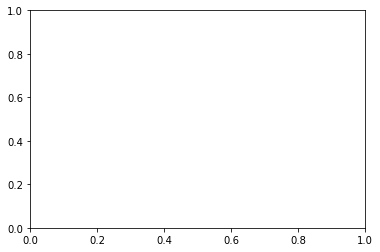

In [106]:
x = graph['launch_speed']
y = graph['launch_angle']
color = 'estimated_ba_using_speedangle'
title = 'Color = xBa'

#plt.scatter(x,y,color,title)

ValueError: s must be a scalar, or float array-like with the same size as x and y

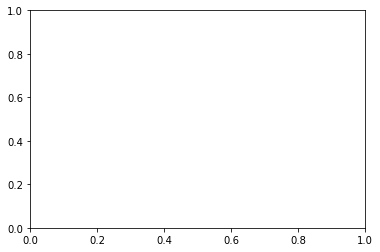

In [112]:
#plt.plot(x,y)
plt.scatter(x,y,color)
plt.show()

In [99]:
for c in pitchers.columns:
    print(c)

pitcher
pitches
plate_apps
at_bats
hits
singles
doubles
triples
hrs
walks
hbp
wBB
wHBP
w1B
w2B
w3B
strikeouts
wHR
ba
obp
slg
ops
woba


In [98]:
x = pitchers['aa

,pitcher,pitches,plate_apps,at_bats,hits,singles,doubles,triples,hrs,walks,...,w1B,w2B,w3B,strikeouts,wHR,ba,obp,slg,ops,woba
0,425794,129,35,29.0,7.0,5.0,1.0,0.0,1.0,4.0,...,4.410,1.243,0.000,6.0,2.003,0.241379,0.342857,0.379310,0.722167,0.319029
1,425844,139,40,39.0,13.0,7.0,3.0,0.0,3.0,1.0,...,6.174,3.729,0.000,7.0,6.009,0.333333,0.350000,0.641026,0.991026,0.415200
2,434378,200,49,43.0,11.0,8.0,3.0,0.0,0.0,6.0,...,7.056,3.729,0.000,8.0,0.000,0.255814,0.346939,0.325581,0.672520,0.305327
3,445276,69,17,15.0,5.0,4.0,0.0,0.0,1.0,2.0,...,3.528,0.000,0.000,7.0,2.003,0.333333,0.411765,0.533333,0.945098,0.407235
4,445926,104,27,25.0,5.0,4.0,0.0,0.0,1.0,2.0,...,3.528,0.000,0.000,6.0,2.003,0.200000,0.259259,0.320000,0.579259,0.256407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,694363,131,38,33.0,10.0,5.0,2.0,1.0,2.0,5.0,...,4.410,2.486,1.568,5.0,4.006,0.303030,0.394737,0.606061,1.000797,0.419737
630,694813,82,24,21.0,8.0,5.0,3.0,0.0,0.0,2.0,...,4.410,3.729,0.000,2.0,0.000,0.380952,0.416667,0.523810,0.940476,0.397125
631,696136,97,23,17.0,4.0,2.0,2.0,0.0,0.0,4.0,...,1.764,2.486,0.000,5.0,0.000,0.235294,0.347826,0.352941,0.700767,0.305826
632,696147,45,11,10.0,5.0,5.0,0.0,0.0,0.0,1.0,...,4.410,0.000,0.000,3.0,0.000,0.500000,0.545455,0.500000,1.045455,0.464182


## Pitch Sequencing

In [185]:
df['game_ab'] = df['game_pk'].astype('str') + '_' + df['at_bat_number'].astype('str')

In [186]:
sequences = df[df.pitch_type.isna() == False].groupby(['game_ab'])['pitch_type'].apply('-'.join).reset_index()

In [192]:
df = df.merge(sequences, left_on = 'game_ab', right_on = 'game_ab').rename(columns = {'pitch_type_y' : 'sequence'
                                                                                ,'pitch_type_x' : 'pitch_type'})

In [203]:
gr_sequences = df.groupby(['sequence']).agg({'pitcher' : 'count'}).reset_index()#.rename(columns = {'pitcher', 'frequency'})

In [210]:
gr_sequences.rename(columns = {'pitcher' : 'frequency'}).sort_values(by='frequency', ascending = False).head(25)

,sequence,frequency
494,FF-FF-FF-FF,328
476,FF-FF-FF,318
428,FF-FF,240
311,FF,230
505,FF-FF-FF-FF-FF,150
510,FF-FF-FF-FF-FF-FF,132
1005,FS-FF,120
666,FF-FS-FF,111
1033,FS-FF-FF,90
682,FF-FS-FF-FF,88


In [161]:
latest_start.groupby(['at_bat_number']).pitch_type.apply('-'.join).reset_index()

,at_bat_number,pitch_type
0,5,FS-CU-FF
1,6,FF-SI-FF-CU
2,7,SI
3,8,FS-FF-FF-FS-FC
4,9,FC-FF
5,10,FS-FF
6,11,FC-SI-FC-FC-CU
7,15,FC-FS-FC-FF-FC-FF
8,16,SI-SI
9,17,CU-SI-FS-FS-FF-CU


## Extra Dev

In [ ]:
latest_start['sequence'] = ''
#for j in range(len([i for i in df.at_bat_number.unique()])):
for i in df.at_bat_number.unique():
    while latest_start.pitch_number != 1:
        latest_start[latest_start.at_bat_number == i]['sequence']

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [19]:
latest_start = df[df.game_date == '2023-09-30']

In [ ]:
len([i for i in latest_start.at_bat_number.unique()])

30

In [117]:
latest_start.groupby('at_bat_number').agg(

In [133]:
latest_start[['at_bat_number','pitch_number']].sort_values(by='at_bat_number').head(25)

,at_bat_number,pitch_number
105,5,1
104,5,2
103,5,3
102,6,1
101,6,2
100,6,3
99,6,4
98,7,1
97,8,1
96,8,2


In [131]:
latest_start[['pitch_type','pitch_number', 'pitch_name']]

,pitch_type,pitch_number,pitch_name
0,FS,1,Split-Finger
1,CU,7,Curveball
2,FS,6,Split-Finger
3,FS,5,Split-Finger
4,FF,4,4-Seam Fastball
...,...,...,...
101,FF,2,4-Seam Fastball
102,CU,1,Curveball
103,FS,3,Split-Finger
104,CU,2,Curveball


### Dataframe Dictionary

In [67]:
df_dict = dict((str(x.replace(' ','_')), pd.DataFrame()) for x in df.player_name.unique())
game_dates = dict((str(x.replace(' ','_')), pd.DataFrame()) for x in df_dict.keys())
game_years = dict((str(x.replace(' ','_')), pd.DataFrame()) for x in df_dict.keys())

In [84]:
for v in df.player_name.unique():
    for d in df_dict.keys():
        df_dict[d] = df[df.player_name == v]
        game_dates[d] = get_stats('game_date', df_dict[d])
        game_years[d] = get_stats('game_year', df_dict[d])
        games[d] = get_stats('game_pk', df_dict[d])

In [85]:
df_dict['Citizens_Bank_Park']

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
15955,FF,2015-05-24,93.4,-2.27,6.28,Rogers Centre,493128,592836,single,hit_into_play,...,0.718,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134
15956,FF,2015-05-24,95.6,-2.32,6.15,Rogers Centre,493128,592836,NaN,ball,...,0.718,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134
15957,FF,2015-05-24,94.3,-2.32,6.15,Rogers Centre,572365,592836,walk,ball,...,0.718,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134
15958,FS,2015-05-24,89.2,-2.42,5.91,Rogers Centre,572365,592836,NaN,ball,...,0.718,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134
15959,FF,2015-05-24,95.1,-2.19,6.21,Rogers Centre,572365,592836,NaN,called_strike,...,0.718,0.881,1.256,1.594,2.065,0.2,-0.392,0.112,9.421,3.134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16833,FF,2014-09-24,97.6,-1.96,6.42,Rogers Centre,430832,592836,NaN,ball,...,0.722,0.892,1.283,1.635,2.135,0.2,-0.377,0.107,9.117,3.132
16834,FS,2014-09-24,90.4,-2.37,6.13,Rogers Centre,408314,592836,strikeout,swinging_strike,...,0.722,0.892,1.283,1.635,2.135,0.2,-0.377,0.107,9.117,3.132
16835,FS,2014-09-24,91.7,-2.29,6.03,Rogers Centre,408314,592836,NaN,ball,...,0.722,0.892,1.283,1.635,2.135,0.2,-0.377,0.107,9.117,3.132
16836,FF,2014-09-24,97.0,-2.11,6.37,Rogers Centre,408314,592836,NaN,foul,...,0.722,0.892,1.283,1.635,2.135,0.2,-0.377,0.107,9.117,3.132


In [81]:
df.player_name.unique()

array(['Citi Field', 'Citizens Bank Park', 'Busch Stadium', 'Petco Park',
       'loanDepot park', 'Tropicana Field', 'Wrigley Field',
       'Oakland Coliseum', 'Truist Park', 'Oracle Park', 'Coors Field',
       'Dodger Stadium', 'Guaranteed Rate Field',
       'Great American Ball Park', 'Yankee Stadium',
       'American Family Field', 'PNC Park', 'Angel Stadium',
       'Nationals Park', 'Fenway Park', 'Oriole Park at Camden Yards',
       'Sahlen Field', 'T-Mobile Park', 'Globe Life Field',
       'Minute Maid Park', 'Chase Field', 'Kauffman Stadium',
       'Comerica Park', 'Target Field', 'Globe Life Park in Arlington',
       'Progressive Field', 'Rogers Centre'], dtype=object)

In [38]:
# Access a Dataframe from my dictionary of dataframes by using the key

In [45]:
chase_field = df_dict['Chase_Field']
cbp = df_dict['Citizens_Bank_Park']

### Extra Stats Dev

In [5]:
w3B = df[df.events == 'triple'].groupby(level).agg({'w3B' : 'sum'}).reset_index()
# Weighted Home runs
wHR = df[df.events == 'home_run'].groupby(level).agg({'wHR' : 'sum'}).reset_index()

a = pitches.merge(plate_apps, how = 'left', left_on = level, right_on = level)
b = a.merge(at_bats, how = 'left', left_on = level, right_on = level)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
0,FS,2023-09-30,85.5,-1.78,6.16,Citi Field,624413,592836,field_out,hit_into_play,...,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
1,CU,2023-09-30,76.6,-1.76,6.12,Citi Field,677595,592836,strikeout,swinging_strike,...,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
2,FS,2023-09-30,87.3,-1.89,6.05,Citi Field,677595,592836,NaN,foul,...,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
3,FS,2023-09-30,85.4,-1.83,6.19,Citi Field,677595,592836,NaN,foul,...,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
4,FF,2023-09-30,91.5,-1.60,6.34,Citi Field,677595,592836,NaN,ball,...,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17592,FF,2013-08-30,92.0,-1.70,6.76,Minute Maid Park,543257,592836,NaN,called_strike,...,0.722,0.888,1.271,1.616,2.101,0.2,-0.384,0.110,9.264,3.048
17593,FC,2013-08-30,90.5,-1.96,6.62,Minute Maid Park,543257,592836,NaN,ball,...,0.722,0.888,1.271,1.616,2.101,0.2,-0.384,0.110,9.264,3.048
17594,FF,2013-08-30,91.5,-1.77,6.70,Minute Maid Park,543257,592836,NaN,called_strike,...,0.722,0.888,1.271,1.616,2.101,0.2,-0.384,0.110,9.264,3.048
17595,FF,2013-08-30,92.9,-1.72,6.64,Minute Maid Park,543257,592836,NaN,ball,...,0.722,0.888,1.271,1.616,2.101,0.2,-0.384,0.110,9.264,3.048


In [15]:
df[df.events.isin(['strikeout','strikeout_double_play'])].groupby('pitcher')

In [17]:
ks = df[df.events.isin(['strikeout','strikeout_double_play'])].groupby(level).agg({'batter' : 'count'}).reset_index().rename(columns = {'batter' : 'strikeouts'})

In [ ]:
walks = df[df.events == 'walk'].groupby(level).agg({'batter' : 'count'}).reset_index().rename(columns = {'batter' : 'walks'})

In [18]:
df.events.unique()

array(['field_out', 'strikeout', nan, 'walk', 'hit_by_pitch', 'home_run',
       'single', 'double', 'force_out', 'triple', 'strikeout_double_play',
       'field_error', 'grounded_into_double_play', 'sac_fly', 'sac_bunt',
       'caught_stealing_2b', 'double_play', 'fielders_choice_out',
       'fielders_choice', 'intent_walk', 'triple_play'], dtype=object)

In [40]:
latest_start[latest_start.inning == 1].iloc[0:5, 90:]

,delta_home_win_exp,delta_run_exp,Season,wOBA,wOBAScale,wBB,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
84,-0.018,-0.400,2023,0.319,1.203,0.696,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
85,0.000,-0.025,2023,0.319,1.203,0.696,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
86,0.000,0.041,2023,0.319,1.203,0.696,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
87,0.000,0.033,2023,0.319,1.203,0.696,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258
88,0.066,0.070,2023,0.319,1.203,0.696,0.726,0.882,1.243,1.568,2.003,0.2,-0.422,0.122,10.036,3.258


In [22]:
for c in latest_start.columns:
    print(c)

pitch_type
game_date
release_speed
release_pos_x
release_pos_z
player_name
batter
pitcher
events
description
spin_dir
spin_rate_deprecated
break_angle_deprecated
break_length_deprecated
zone
des
game_type
stand
p_throws
home_team
away_team
type
hit_location
bb_type
balls
strikes
game_year
pfx_x
pfx_z
plate_x
plate_z
on_3b
on_2b
on_1b
outs_when_up
inning
inning_topbot
hc_x
hc_y
tfs_deprecated
tfs_zulu_deprecated
fielder_2
umpire
sv_id
vx0
vy0
vz0
ax
ay
az
sz_top
sz_bot
hit_distance_sc
launch_speed
launch_angle
effective_speed
release_spin_rate
release_extension
game_pk
pitcher.1
fielder_2.1
fielder_3
fielder_4
fielder_5
fielder_6
fielder_7
fielder_8
fielder_9
release_pos_y
estimated_ba_using_speedangle
estimated_woba_using_speedangle
woba_value
woba_denom
babip_value
iso_value
launch_speed_angle
at_bat_number
pitch_number
pitch_name
home_score
away_score
bat_score
fld_score
post_away_score
post_home_score
post_bat_score
post_fld_score
if_fielding_alignment
of_fielding_alignment
spin_axi